# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Dataset

In [2]:
df=pd.read_csv(r"datasets//churn-bigml-80.csv")

# EDA

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(2666, 20)

In [5]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
df.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

We can use the info() method to output some general information about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
df["Churn"] = df["Churn"].astype("int64")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [11]:
df.describe(include=["object"]).T

,count,unique,top,freq
State,2666,51,WV,88
International plan,2666,2,No,2396
Voice mail plan,2666,2,No,1933


In [12]:
df["Churn"].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [13]:
df["Churn"].value_counts(normalize=True)

0    0.854464
1    0.145536
Name: Churn, dtype: float64

In [14]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
296,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
780,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2087,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
128,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
485,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [15]:
df.sort_values(by=["Total day charge", 'Total day calls'], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1057,SD,98,415,No,No,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1100,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2206,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2218,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1575,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0


In [16]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [17]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [18]:
df.groupby("Churn")["Total day minutes"].mean()

Churn
0    175.104346
1    205.181186
Name: Total day minutes, dtype: float64

In [19]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg(['mean', 'std', 'max', 'min'])

Total day minutes                        Total eve minutes             \
                   mean        std    max  min              mean        std   
Churn                                                                         
0            175.104346  50.105334  313.8  0.0        198.853380  50.818954   
1            205.181186  68.490213  350.8  0.0        209.385309  50.863718   

                   Total night minutes                          
         max   min                mean        std    max   min  
Churn                                                           
0      354.2   0.0          200.464091  51.284496  395.0  43.7  
1      363.7  70.9          205.307216  47.565157  354.9  47.4

In [20]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        50
Total day minutes         350.8
Total day calls             160
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           166
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [21]:
df[ (df["Churn"] == 0) & (df["International plan"] == "No") ]["Total intl minutes"].max()

18.9

In [22]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
0,2126,152
1,270,118


In [23]:
pd.crosstab(df["Churn"], df["International plan"], normalize=True)

International plan,No,Yes
Churn,,
0,0.797449,0.057014
1,0.101275,0.044261


In [24]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)

df.insert(loc=len(df.columns), column="Total calls", value=total_calls)

In [25]:
d = {"No": 0, "Yes": 1}

In [26]:
df["International plan"] = df["International plan"].map(d)

In [27]:
df = df.replace({"Voice mail plan": d})

In [28]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [29]:
df["Total charge"] =df["Total day charge"] + df["Total eve charge"] + df["Total night charge"] + df["Total intl charge"]

In [30]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


In [31]:
df.drop(["Total charge", "Total day calls"], axis=1, inplace=True)

In [32]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,0,1,25,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,0,1,26,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,0,0,0,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,1,0,0,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,1,0,0,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


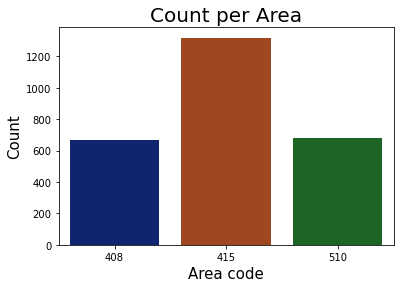

In [33]:
sns.countplot(df["Area code"],palette = "dark")
plt.title("Count per Area",fontsize=20)
plt.xlabel("Area code",fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

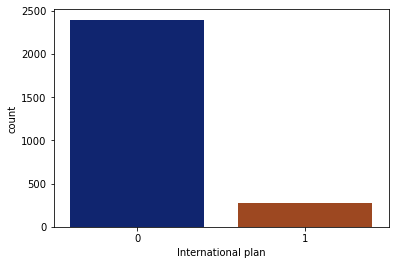

In [34]:
sns.countplot(df["International plan"], palette = "dark")
plt.show()

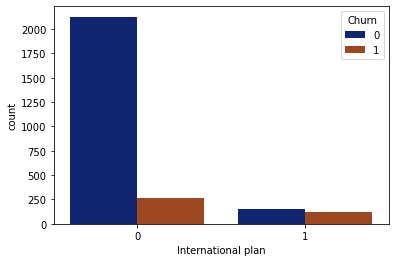

In [35]:
sns.countplot(df["International plan"], hue=df["Churn"], palette = "dark")
plt.show()